# Work with PySpecTcl
This notebook demonstrates:

* How to reach the spectra data through SpecTcl server, and do the data analysis.
* Work with Spectrum class to get spectral info, interface to other HLA.
* Data from multiple SpecTcl servers could be integrated into the same analysis environment.
* Work with other Python packages.

Author: Tong Zhang

Created: 2021-06-04, Last updatd: 2022-09-01


## Preparation of SpecTcl server(s)

Start up the SpecTcl instance on any workstation in DAQ network, keep in mind of the workstation hostname and REST server port number, which is defined in SpecTclInit.tcl file and printed out in the tkcon as Spectcl is starting up.

See Also: [https://wikihost.nscl.msu.edu/AcceleratorPhysics/doku.php?id=apps:pyspectcl#how_does_it_work](https://wikihost.nscl.msu.edu/AcceleratorPhysics/doku.php?id=apps:pyspectcl#how_does_it_work)

### What is **PySpecTcl**
The project **pyspectcl** was created to handle all the data communication between Python client (local) and SpecTcl server (remote).

* Request data from remote
* Data normalization and integration
* Spectrum class for introspection
* Common API for data pre-processing

### How to install
```bash
pip install pyspectcl
```

See Also: [https://wikihost.nscl.msu.edu/AcceleratorPhysics/doku.php?id=apps:pyspectcl#how_to_use_it](https://wikihost.nscl.msu.edu/AcceleratorPhysics/doku.php?id=apps:pyspectcl#how_to_use_it)

In [1]:
import spectcl
spectcl.info()

PySpecTcl (v0.4.1): Python interface to SpecTcl REST server.
Contact: Tong Zhang <zhangt@frib.msu.edu>


### Set up a client to SpecTcl server 

In [2]:
from spectcl.client import Client
client = Client('http://ctlrm-daq4', port=5400)

In [3]:
client

[SpecTcl Client] to http://ctlrm-daq4:5400/spectcl

In [4]:
# But could be re-configured
client.base_url = "http://127.0.0.1"
client.port = 8001
client

[SpecTcl Client] to http://127.0.0.1:8001/spectcl

In [5]:
# Switch back base_url and port
client.base_url = 'http://ctlrm-daq4'
client.port = 5400
client

[SpecTcl Client] to http://ctlrm-daq4:5400/spectcl

### List all spectra

All spectra are packed into a table, with correlated gate info integrated.

In [6]:
client.list('spectrum')

,Type,Parameters,Axes,ChanType,Gate,ShowGate
Name,,,,,,
Dip::Dip34.brho,1,[aris.Dip34.brho],"[{'low': 0.0, 'high': 10.0, 'bins': 1000}]",long,ungated,NaN
Dip::Dip34.deltaP,1,[aris.Dip34.deltaP],"[{'low': -0.1, 'high': 0.1, 'bins': 5000}]",long,ungated,NaN
Dip::Dip34.deltaP_vs_Dip45.deltaP,2,"[aris.Dip34.deltaP, aris.Dip45.deltaP]","[{'low': -0.1, 'high': 0.1, 'bins': 500}, {'lo...",long,ungated,NaN
Dip::Dip34.deltaP_vs_TKE,2,"[aris.Dip34.deltaP, aris.pid.TKE]","[{'low': -0.025, 'high': 0.025, 'bins': 700}, ...",long,ungated,NaN
Dip::Dip34.xf,1,[aris.Dip34.xf],"[{'low': -100.0, 'high': 100.0, 'bins': 1000}]",long,ungated,NaN
...,...,...,...,...,...,...
trk::db5.x_vs_pid.x,2,"[aris.pid.x, aris.db5.x]","[{'low': -125.0, 'high': 125.0, 'bins': 500}, ...",word,ungated,NaN
trk::db5.xt,s,"[aris.db5.xt.000, aris.db5.xt.001, aris.db5.xt...","[{'low': -75.0, 'high': 75.0, 'bins': 600}]",long,db5_ppac01_sum,NaN
trk::db5.y,1,[aris.db5.y],"[{'low': -75.0, 'high': 75.0, 'bins': 6000}]",long,db5_ppac01_sum,NaN


### List all Gates

All gates could also be listed as a table, by default, only list the ones with valid Parameters/Gates definitions.

In [7]:
client.list('gate')

,Type,Gates,Parameters,Points,Desc
Name,,,,,
db1_ppac01_sum,*,"[db1_ppac0_sum, db1_ppac1_sum]",NaN,NaN,And
db1_ppac01_sum_foi,*,"[db1_ppac01_sum, foi]",NaN,NaN,And
db1_ppac0_sum,c,NaN,"[aris.db1.ppac0.sumyc, aris.db1.ppac0.sumxc]","[{'x': 2739.043945, 'y': 2697.76123}, {'x': 39...",Contour
db1_ppac1_sum,c,NaN,"[aris.db1.ppac1.sumyc, aris.db1.ppac1.sumxc]","[{'x': 3947.068848, 'y': 3915.422852}, {'x': 3...",Contour
db3_ppac01_sum,*,"[db3_ppac0_sum, db3_ppac1_sum]",NaN,NaN,And
db3_ppac01_sum_foi,*,"[db3_ppac01_sum, foi]",NaN,NaN,And
db3_ppac0_sum,c,NaN,"[aris.db3.ppac0.sumyc, aris.db3.ppac0.sumxc]","[{'x': 3948.776367, 'y': 3957.711426}, {'x': 3...",Contour
db3_ppac1_sum,c,NaN,"[aris.db3.ppac1.sumyc, aris.db3.ppac1.sumxc]","[{'x': 3917.188477, 'y': 3990.049805}, {'x': 2...",Contour
db4_ppac0_sum,c,NaN,"[aris.db4.ppac0.sumyc, aris.db4.ppac0.sumxc]","[{'x': 3903.80249, 'y': 3966.417969}, {'x': 38...",Contour


## Work with Spectrum

``Spectrum`` is a dedicated class to encapsulate all the available information regarding one spectrum to a single entity, featuring convenient and useful APIs for info query and data pre-processing.

* Self-introspection of a Spectrum object gives all the properties of a spectrum.
* Integrated gate information if it is available.
* Quick and powerful data visualization of a spectrum.
* Statistical analyzed results as a table.

In [8]:
from spectcl.client import Client

In [9]:
client = Client('http://ctlrm-daq4', port=5400)
client

[SpecTcl Client] to http://ctlrm-daq4:5400/spectcl

In [10]:
# Filter, with the argument: filter
client.list('spectrum', filter='pid*db1*')

,Type,Parameters,Axes,ChanType,Gate,ShowGate
Name,,,,,,
pid::db1.pin.dE_vs_tof.tac.rf1,2,"[aris.tof.tac.rf1, aris.db1.pin.dE]","[{'low': 0.0, 'high': 4000.0, 'bins': 1000}, {...",word,ungated,NaN
pid::db1.pin.e_vs_tof.tac.rf1,2,"[aris.tof.tac.rf1, aris.db1.pin.e]","[{'low': 0.0, 'high': 4000.0, 'bins': 1000}, {...",word,ungated,foi
pid::db1.pin.e_vs_tof.tac.rf1!gated,2,"[aris.tof.tac.rf1, aris.db1.pin.e]","[{'low': 0.0, 'high': 4000.0, 'bins': 1000}, {...",word,foi,foi
pid::db1.pin.e_vs_tof.tac.rf1_test,2,"[aris.tof.tac.rf1, aris.db1.pin.e]","[{'low': 0.0, 'high': 4000.0, 'bins': 1000}, {...",word,ungated,foi
pid::db1.pin.e_vs_x,2,"[aris.db1.x, aris.db1.pin.e]","[{'low': -50.0, 'high': 50.0, 'bins': 500}, {'...",word,db1_ppac01_sum,NaN
pid::db1.pin.e_vs_y,2,"[aris.db1.y, aris.db1.pin.e]","[{'low': -50.0, 'high': 50.0, 'bins': 500}, {'...",word,db1_ppac01_sum,NaN
pidX::db5.pin.e_vs_db1.ppac0.x,2,"[aris.db1.ppac0.x, aris.db5.pin.e]","[{'low': -50.0, 'high': 50.0, 'bins': 500}, {'...",long,db1_ppac01_sum,NaN
pidX::db5.pin.e_vs_db1.ppac0.y,2,"[aris.db1.ppac0.y, aris.db5.pin.e]","[{'low': -50.0, 'high': 50.0, 'bins': 500}, {'...",long,db1_ppac01_sum,NaN
pidX::db5.pin.e_vs_db1.ppac1.x,2,"[aris.db1.ppac1.x, aris.db5.pin.e]","[{'low': -50.0, 'high': 50.0, 'bins': 500}, {'...",long,db1_ppac01_sum,NaN


In [11]:
# General filter with the DataFrame API
a = client.list('spectrum')
# list all gated spectra, .head() is used to reduce the length of output
a[a['Gate'] != 'ungated'].head()

,Type,Parameters,Axes,ChanType,Gate,ShowGate
Name,,,,,,
ctl::db1.ppac0.y_vs_x,2,"[aris.db1.ppac0.x, aris.db1.ppac0.y]","[{'low': -75.0, 'high': 75.0, 'bins': 300}, {'...",long,db1_ppac0_sum,NaN
ctl::db1.ppac1.y_vs_x,2,"[aris.db1.ppac1.x, aris.db1.ppac1.y]","[{'low': -75.0, 'high': 75.0, 'bins': 300}, {'...",long,db1_ppac1_sum,NaN
ctl::db3.ppac0.y_vs_x,2,"[aris.db3.ppac0.x, aris.db3.ppac0.y]","[{'low': -125.0, 'high': 125.0, 'bins': 500}, ...",long,db3_ppac0_sum,NaN
ctl::db3.ppac1.y_vs_x,2,"[aris.db3.ppac1.x, aris.db3.ppac1.y]","[{'low': -125.0, 'high': 125.0, 'bins': 500}, ...",long,db3_ppac1_sum,NaN
ctl::db4.ppac0.y_vs_x,2,"[aris.db4.ppac0.x, aris.db4.ppac0.y]","[{'low': -100.0, 'high': 100.0, 'bins': 1000},...",long,db4_ppac0_sum,NaN


In [12]:
# Get data as a Spectrum instance
sp1 = client.get_spectrum('pid::db1.pin.e_vs_tof.tac.rf1')
sp2 = client.get_spectrum('pid::db1.pin.e_vs_tof.tac.rf1!gated')

In [13]:
sp1 # in Jupyter-notebook, the output will be rendered

,x,y,count,aris.tof.tac.rf1,aris.db1.pin.e
id,,,,,
0,32,8,1,128.0,40.0
1,33,8,18,132.0,40.0
2,34,8,26,136.0,40.0
3,35,8,32,140.0,40.0
4,36,8,29,144.0,40.0
...,...,...,...,...,...
25571,585,801,2,2340.0,4005.0
25572,586,801,1,2344.0,4005.0
25573,588,801,2,2352.0,4005.0


In [14]:
# Self-introspection: Spectrum name
sp1.name

'pid::db1.pin.e_vs_tof.tac.rf1'

In [15]:
# Data type
sp1.dtype

dtype('int16')

In [16]:
# Spectrum type
sp1.stype

'2D'

In [17]:
# Spectrum axes
sp1.axes

[{'low': 0.0, 'high': 4000.0, 'bins': 1000},
 {'low': 0.0, 'high': 4000.0, 'bins': 800}]

In [18]:
# Parameters
sp1.parameters

['aris.tof.tac.rf1', 'aris.db1.pin.e']

In [19]:
# Gated?
print(f"Spectrum '{sp1.name}' is gated? ", sp1.is_gated())
print(f"Spectrum '{sp2.name}' is gated? ", sp2.is_gated())

Spectrum 'pid::db1.pin.e_vs_tof.tac.rf1' is gated?  False
Spectrum 'pid::db1.pin.e_vs_tof.tac.rf1!gated' is gated?  True


In [20]:
# Introspect the applied gate
sp2.gate

Gate 'foi': 'Contour' on parameters ['aris.tof.tac.rf1', 'aris.db1.pin.e'] of (7) points

In [21]:
# Introspect the related gate: match the parameters
# it will be drawing along with the spectrum plot if is not None
sp1.show_gate, sp2.show_gate

(Gate 'foi': 'Contour' on parameters ['aris.tof.tac.rf1', 'aris.db1.pin.e'] of (7) points,
 Gate 'foi': 'Contour' on parameters ['aris.tof.tac.rf1', 'aris.db1.pin.e'] of (7) points)

In [22]:
# The points of the contour gate
sp2.gate.points

[{'x': 2301.09082, 'y': 2253.332275},
 {'x': 2270.935791, 'y': 2356.861084},
 {'x': 2166.602783, 'y': 2388.303223},
 {'x': 2092.035156, 'y': 2300.524902},
 {'x': 2153.287109, 'y': 2211.802734},
 {'x': 2255.817627, 'y': 2211.802734},
 {'x': 2255.817627, 'y': 2211.802734}]

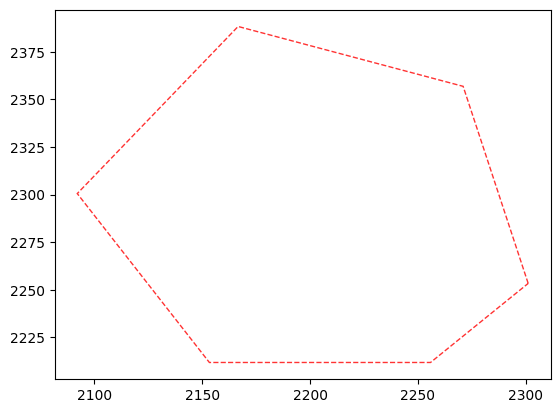

In [23]:
# See how it looks like
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sp2.gate.draw(ax=ax)
ax.autoscale()

In [24]:
# Get axes arraies in channel coordinate (not mapped), a list of two array for x, y axis
sp1.get_axes_values(map=False)

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [25]:
# Get axes arraies in world coordinate (mapped)
sp1.get_axes_values()

[array([   0.,    4.,    8.,   12.,   16.,   20.,   24.,   28.,   32.,
          36.,   40.,   44.,   48.,   52.,   56.,   60.,   64.,   68.,
          72.,   76.,   80.,   84.,   88.,   92.,   96.,  100.,  104.,
         108.,  112.,  116.,  120.,  124.,  128.,  132.,  136.,  140.,
         144.,  148.,  152.,  156.,  160.,  164.,  168.,  172.,  176.,
         180.,  184.,  188.,  192.,  196.,  200.,  204.,  208.,  212.,
         216.,  220.,  224.,  228.,  232.,  236.,  240.,  244.,  248.,
         252.,  256.,  260.,  264.,  268.,  272.,  276.,  280.,  284.,
         288.,  292.,  296.,  300.,  304.,  308.,  312.,  316.,  320.,
         324.,  328.,  332.,  336.,  340.,  344.,  348.,  352.,  356.,
         360.,  364.,  368.,  372.,  376.,  380.,  384.,  388.,  392.,
         396.,  400.,  404.,  408.,  412.,  416.,  420.,  424.,  428.,
         432.,  436.,  440.,  444.,  448.,  452.,  456.,  460.,  464.,
         468.,  472.,  476.,  480.,  484.,  488.,  492.,  496.,  500.,
      

In [26]:
# Get spectrum data in world coordinate, a table of data with three columns
sp1.get_data()

,aris.tof.tac.rf1,aris.db1.pin.e,count
id,,,
0,128.0,40.0,1
1,132.0,40.0,18
2,136.0,40.0,26
3,140.0,40.0,32
4,144.0,40.0,29
...,...,...,...
25571,2340.0,4005.0,2
25572,2344.0,4005.0,1
25573,2352.0,4005.0,2


In [27]:
# Get spectrum data in channel coordinate
sp1.get_data(map=False)

,x,y,count
id,,,
0,32,8,1
1,33,8,18
2,34,8,26
3,35,8,32
4,36,8,29
...,...,...,...
25571,585,801,2
25572,586,801,1
25573,588,801,2


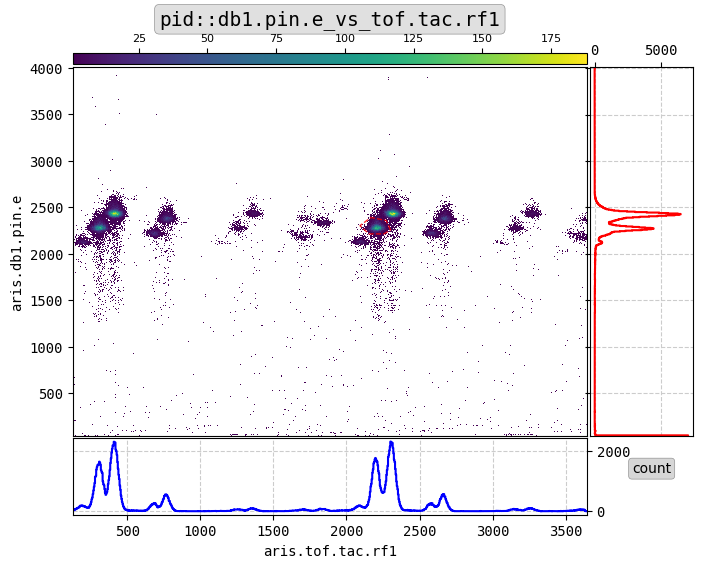

In [28]:
# Spectrum visualization
sp1.plot(figsize=(8, 6));

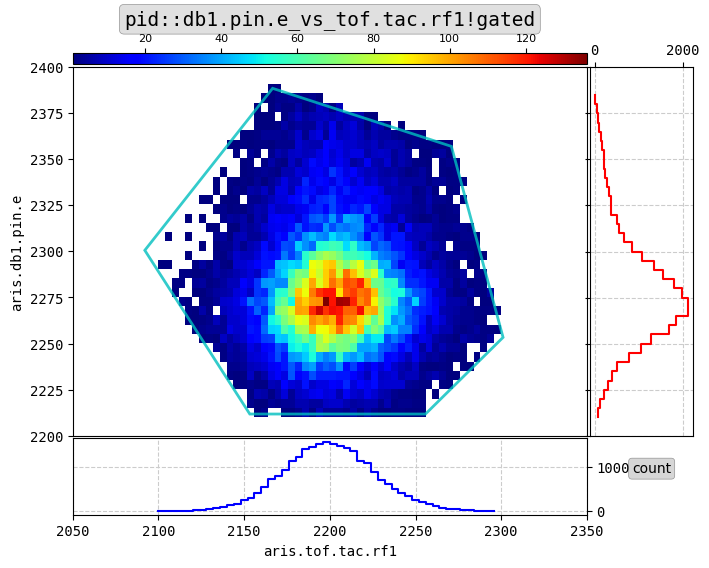

In [29]:
# Pass arguments
sp2.plot(xlim=(2050, 2350), ylim=(2200, 2400), cmap='jet',
         draw_gate_dict={'ls': '-', 'lw': 2, 'color': 'c'});

Spectral type: 1D, Parameters: ['aris.db1.FSTD1.e']


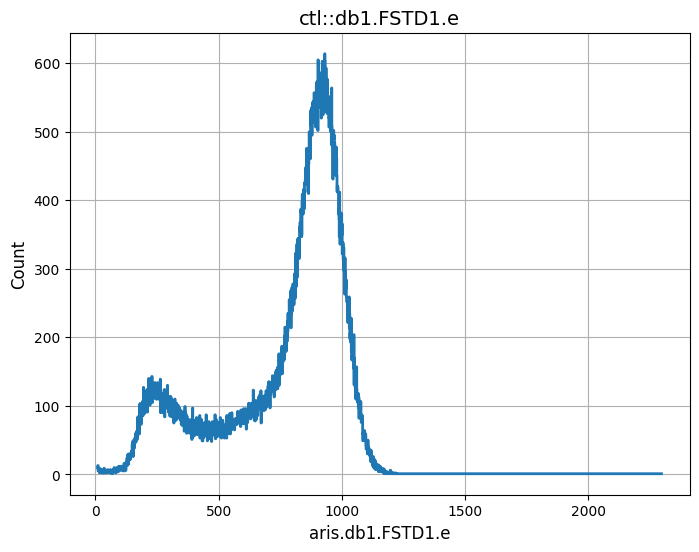

In [30]:
# Get another 1D spectrum
sp3 = client.get_spectrum('ctl::db1.FSTD1.e')
print(f"Spectral type: {sp3.stype}, Parameters: {sp3.parameters}")
sp3.plot(legend=False, lw=2);

In [31]:
# Statistical report
print(sp1.name)
sp1.stats()

pid::db1.pin.e_vs_tof.tac.rf1


,Sum,Ratio,<x>,<y>,σx,σy,FWHMx,FWHMy,ρ
All,180474,1.000000,1426.532376,2231.217294,978.909144,498.078178,2305.154874,1172.884478,-0.016905
foi,25320,0.140297,2202.031280,2277.514810,26.812254,29.956422,63.138033,70.541983,0.017896


In [32]:
print(sp2.name)
sp2.stats()

pid::db1.pin.e_vs_tof.tac.rf1!gated


,Sum,Ratio,<x>,<y>,σx,σy,FWHMx,FWHMy,ρ
All,25342,1.000000,2201.923763,2277.154329,26.778317,29.881523,63.058117,70.365610,0.016114
foi,25262,0.996843,2201.962315,2277.343441,26.733818,29.721425,62.953330,69.988607,0.015516


In [33]:
print(sp3.name)
sp3.stats()

ctl::db1.FSTD1.e


,Sum,Ratio,<x>,σx,FWHM
All,174992,1.0,769.290219,250.773007,590.525303


### Create a new spectrum

In [34]:
new_sp_conf = sp1.clone()
new_sp_conf.name = f"{sp1.name}_test"

In [35]:
new_sp = client.add_spectrum(new_sp_conf)

The spectrum is already defined, please give a different name.


In [36]:
new_sp

In [37]:
# reload data to see the new 

### Gate application

In [38]:
foi_gate = client.get_gate('foi')
foi_gate

Gate 'foi': 'Contour' on parameters ['aris.tof.tac.rf1', 'aris.db1.pin.e'] of (7) points

In [39]:
sp1.is_gated()

False

In [40]:
# Set gate
#sp3.gate = 'FPslits'

In [41]:
#sp3.gate

In [42]:
#client.list('spectrum', filter='pid::fp.pin.dE_vs_tof.rf1*')

## Interface to Allison-scanner app

Pre-processing the 2D spectrum of transverse phase space, i.e. `x` vs `x'`(`a`) or `y` vs `y'`(`b`), to interface the data with Allison-scanner app for emittance and Twiss parameter calculation.

Note:
* Fake voltage info is generated from x'.
* Ion species info is only used for mapping voltage to x' domain.
* Calculate normalized emittance from geometry emittance with given particle energy.

In [43]:
#from spectcl.contrib import export_spectrum_for_allison

In [44]:
#sp = data_client.get_spectrum('trk::fp.a_vs_x')

In [45]:
#export_spectrum_for_allison('test.json', sp)
# Load the file into Allison Scanner app.

Normalized emittance is not reflecting the real data.
<img src="as-results.png" width="800" />

### Create another client hooking to another SpecTcl server

In [46]:
#client1 = DataClient(port=8001)
#client1

In [47]:
#spec_name = 'pid::fp.pin.dE_vs_tof.rf2'
#sp2 = client1.get_spectrum(spec_name)

In [48]:
#sp2.plot(s=3, fontsize=14)

### Advanced processing
e.g. use existing clustering algorithms to auto-cluster isotops.

In [49]:
#from sklearn.mixture import BayesianGaussianMixture

In [50]:
# from sklearn.mixture import BayesianGaussianMixture as BGMM
# from matplotlib.patches import Ellipse
# import matplotlib.pyplot as plt

# def draw_ellipse(position, covariance, ax=None, **kwargs):
#     """Draw an ellipse with a given position and covariance"""
#     ax = ax or plt.gca()
    
#     # Convert covariance to principal axes
#     if covariance.shape == (2, 2):
#         U, s, Vt = np.linalg.svd(covariance)
#         angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
#         width, height = 2 * np.sqrt(s)
#     else:
#         angle = 0
#         width, height = 2 * np.sqrt(covariance)
    
#     # Draw the Ellipse
#     for nsig in range(1, 4):
#         ax.add_patch(Ellipse(position, nsig * width, nsig * height,
#                              angle, **kwargs))
        
# def plot_gmm(gmm, X, label=True, ax=None, cmap='viridis', ms=10, ellipse_on=False, equal_axis=False):
#     ax = ax or plt.gca()
#     labels = gmm.fit(X).predict(X)
#     if label:
#         ax.scatter(X[:, 0], X[:, 1], c=labels, s=ms, cmap=cmap, zorder=2)
#     else:
#         ax.scatter(X[:, 0], X[:, 1], s=ms, zorder=2)
#     if equal_axis:
#         ax.axis('equal')
    
#     if ellipse_on:
#         w_factor = 0.2 / gmm.weights_.max()
#         for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#             draw_ellipse(pos, covar, alpha=w * w_factor)

# def cluster_fn(x_data_range, y_data_range, df, n_components, random_state=0, ms=5, cmap='jet', bayesian_on=True, covariance_type='full', **kws):
#     xmin, xmax = x_data_range
#     ymin, ymax = y_data_range
#     df1 = df[(df.x < xmax) & (df.x > xmin) & (df.y < ymax) & (df.y > ymin)]
#     X = np.vstack([df1.x.to_numpy(), df1.y.to_numpy()]).T
#     if bayesian_on:
#         gmm = BGMM(n_components=n_components, covariance_type=covariance_type, random_state=random_state, **kws)
#     else:
#         gmm = GMM(n_components=n_components, covariance_type=covariance_type, random_state=random_state, **kws)
#     plot_gmm(gmm, X, ms=ms, cmap=cmap, ellipse_on=True)
#     #plt.xlim(0, 400)
#     #plt.ylim(0, 350)

In [51]:
#data['x'] = data['a1900.tof.rf2']
#data['y'] = data['a1900.fp.pin.dE']
#data2 = data.loc[np.repeat(data.index.values, 5 * data['count'])]

In [52]:
#cluster_fn([0, 400], [0, 350], data2, 100, random_state=43, bayesian_on=True, covariance_type='full', ms=5)